<a href="https://colab.research.google.com/github/JamesCraig35/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
  James Craig

# Load and Inspect Data

In [342]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [343]:
df = "/content/drive/MyDrive/Coding_dojo/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week01/Data/sales_predictions_2023.csv"
df_sales = pd.read_csv(df)
df_sales.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71
5,FDP36,10.39,Regular,0.00,Baking Goods,51.40,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.61
6,FDO10,13.65,Regular,0.01,Snack Foods,57.66,OUT013,1987,High,Tier 3,Supermarket Type1,343.55
7,FDP10,NaN,Low Fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,"4,022.76"
8,FDH17,16.20,Regular,0.02,Frozen Foods,96.97,OUT045,2002,NaN,Tier 2,Supermarket Type1,"1,076.60"
9,FDU28,19.20,Regular,0.09,Frozen Foods,187.82,OUT017,2007,NaN,Tier 2,Supermarket Type1,"4,710.53"


In [344]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [345]:
df_sales.shape

(8523, 12)

# Clean Data

In [346]:
df_duplicated_rows = df_sales.duplicated()
df_sales.duplicated().sum()

0

In [347]:
df_sales.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [348]:
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

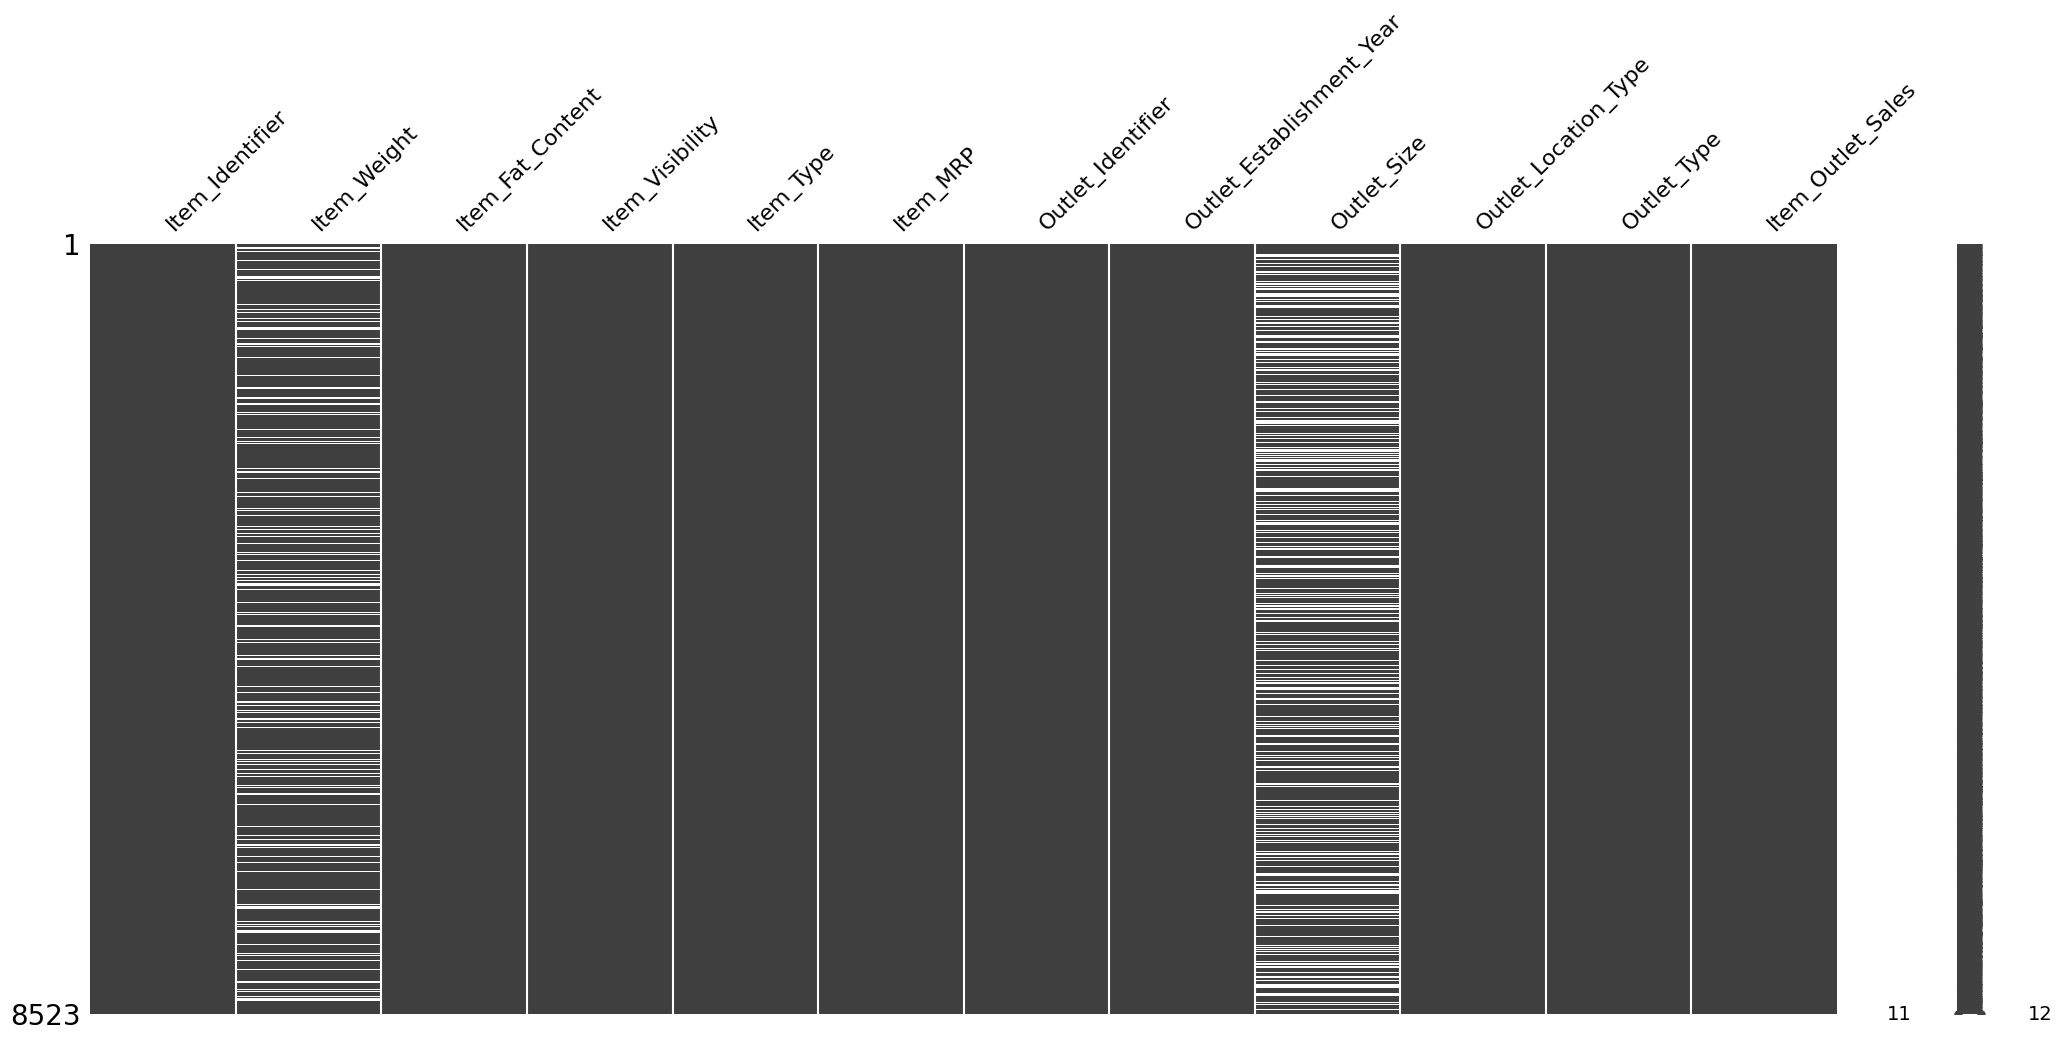

In [349]:
import missingno as msno
msno.matrix(df_sales);
df_sales['Item_Weight'].fillna(-1, inplace=True)
df_sales['Outlet_Size'].fillna('Missing', inplace=True)

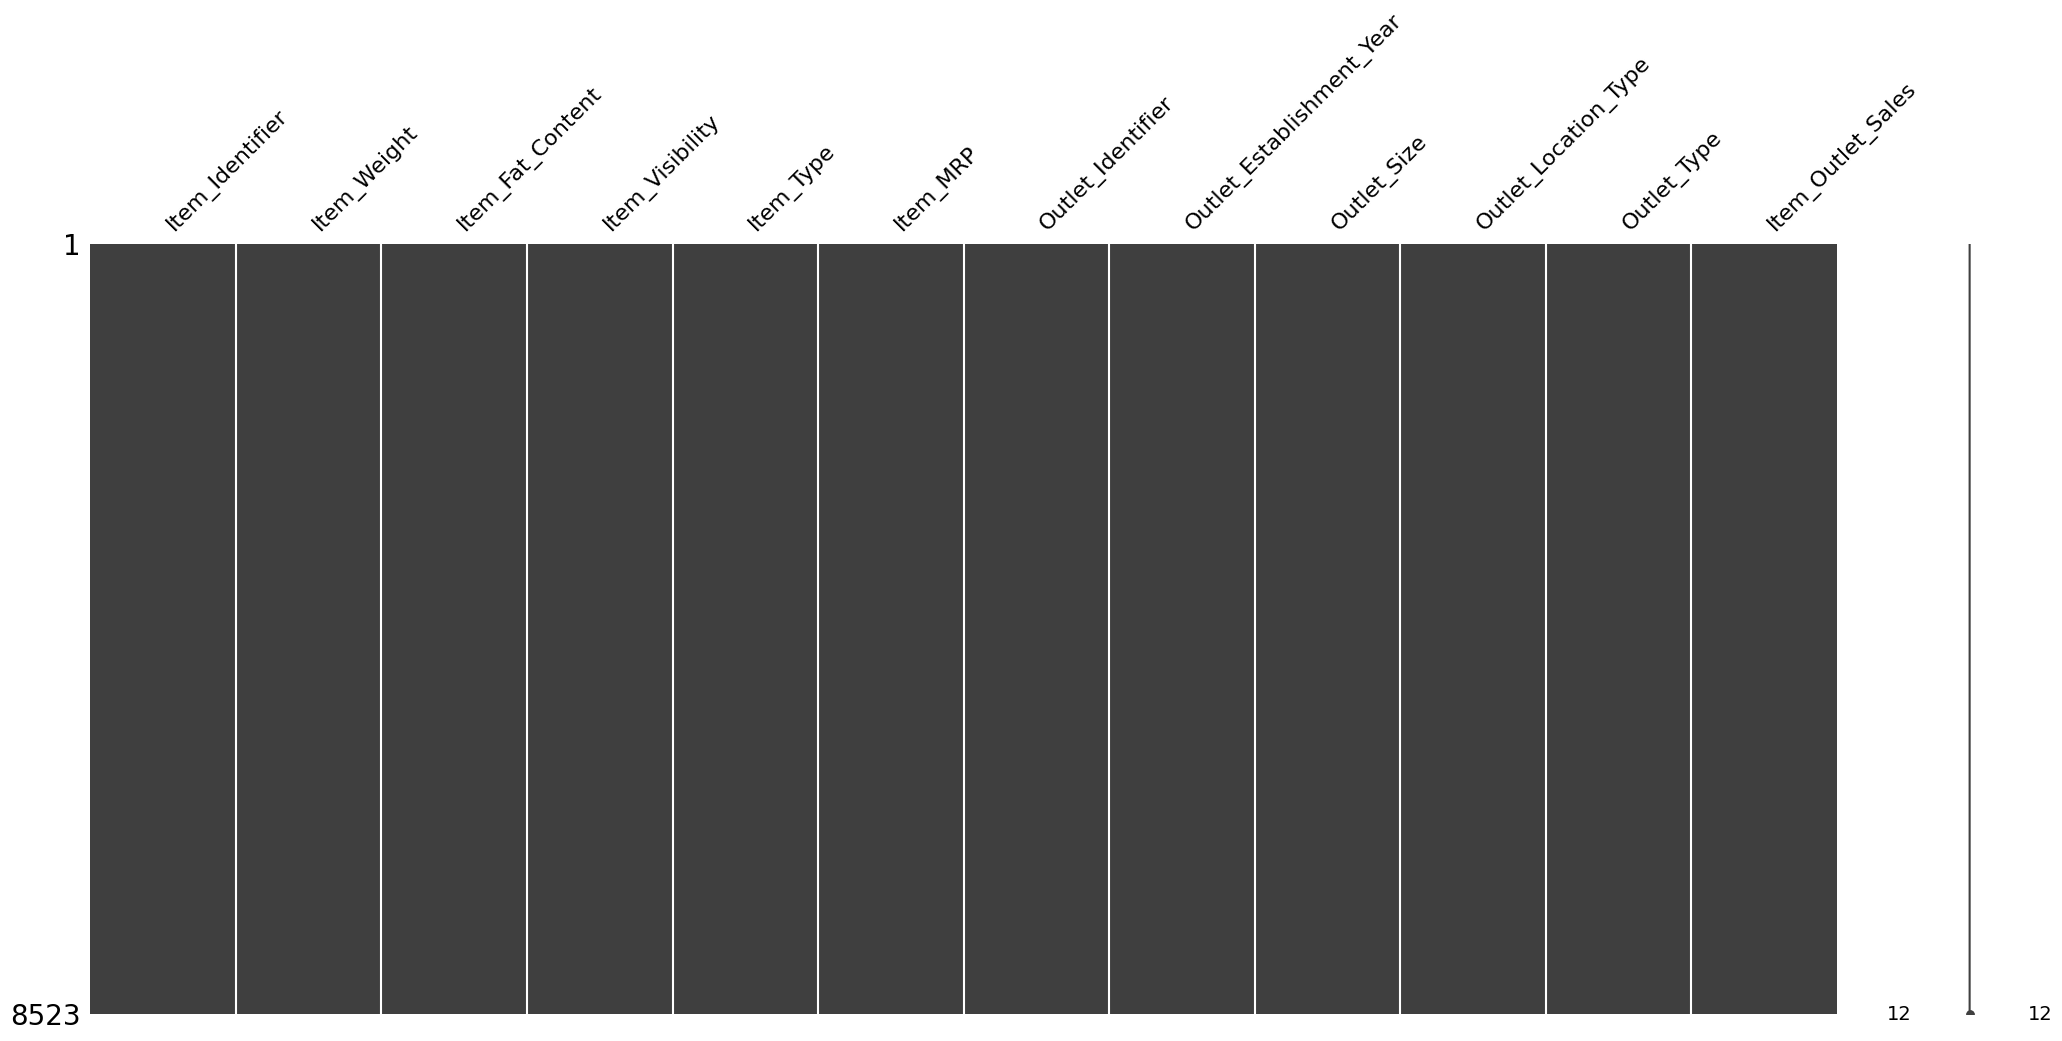

In [350]:
# Recalculating Null_sums
null_sums = df_sales.isna().sum()
msno.matrix(df_sales);

In [351]:
print(null_sums)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [352]:
from pandas.core.arrays.interval import value_counts
df_sales_object = df_sales.select_dtypes(include='object').columns
for object in df_sales_object:
  df_sales[object].value_counts()
  print(df_sales[object].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium     27

In [353]:
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF','Low Fat')
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('High','Large')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace("low fat", "Low Fat")
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('Low fat','Low Fat')
df_sales_object = df_sales.select_dtypes(include='object').columns
for object in df_sales_object:
  df_sales[object].value_counts()
  print(df_sales[object].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium     2793
Missing    2410
Small      2388
Large       9

In [354]:
import numpy as np
numerical_columns = df_sales.select_dtypes(include=[np.number]).columns
summary_statistics = df_sales[numerical_columns].describe()
summary_statistics

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,"8,523.00","8,523.00","8,523.00","8,523.00","8,523.00"
mean,10.48,0.07,140.99,"1,997.83","2,181.29"
std,6.72,0.05,62.28,8.37,"1,706.50"
min,-1.00,0.00,31.29,"1,985.00",33.29
25%,6.65,0.03,93.83,"1,987.00",834.25
50%,11.00,0.05,143.01,"1,999.00","1,794.33"
75%,16.00,0.09,185.64,"2,004.00","3,101.30"
max,21.35,0.33,266.89,"2,009.00","13,086.96"


# Exploratory Data Analysis

## Histogram of Item Types

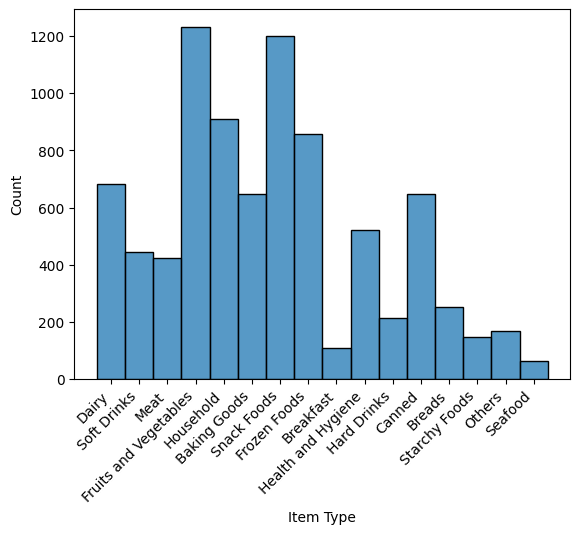

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df_sales, x='Item_Type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Type')
plt.show()

## Box plot of the Outlet Establishment Year

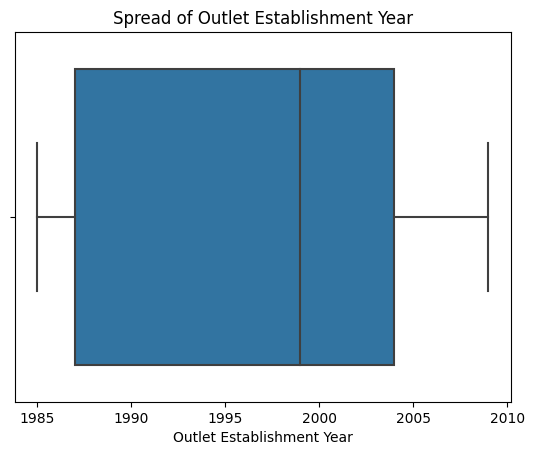

In [356]:
sns.boxplot(data=df_sales, x='Outlet_Establishment_Year')
plt.title('Spread of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.show()

## Countplot of Super Market Types

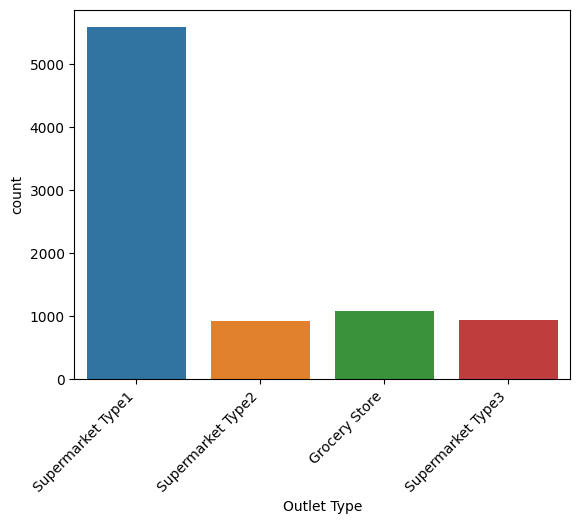

In [357]:
sns.countplot(x=df_sales['Outlet_Type'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Outlet Type')
plt.show()

## Correlation Heatmap

In [358]:
df_sales_correlations = df_sales.corr()
print(df_sales_correlations)

                           Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                       1.00            -0.08      0.02   
Item_Visibility                  -0.08             1.00     -0.00   
Item_MRP                          0.02            -0.00      1.00   
Outlet_Establishment_Year         0.54            -0.07      0.01   
Item_Outlet_Sales                -0.06            -0.13      0.57   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                     0.54              -0.06  
Item_Visibility                                -0.07              -0.13  
Item_MRP                                        0.01               0.57  
Outlet_Establishment_Year                       1.00              -0.05  
Item_Outlet_Sales                              -0.05               1.00  


<ipython-input-358-79218e2fb9c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales_correlations = df_sales.corr()


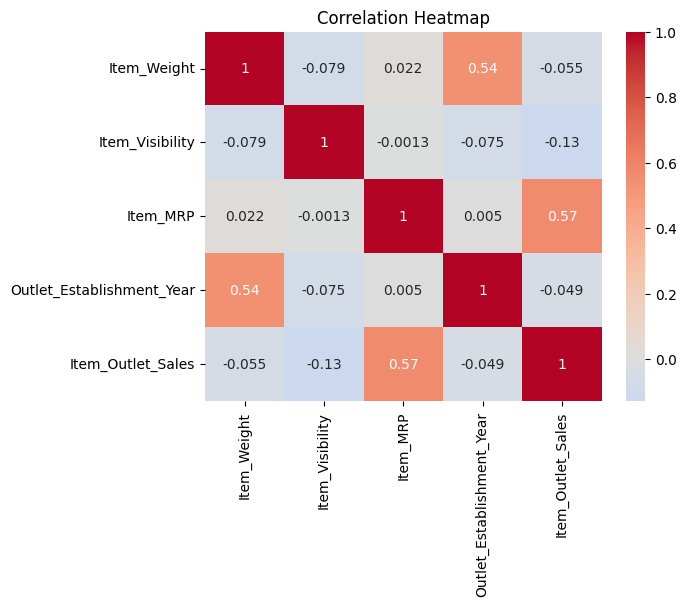

In [359]:
sns.heatmap(df_sales_correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Feature Inspection

In [360]:
# Removing the placeholders and replacing them with null values.
import numpy as np
df_sales = df_sales.replace({-1: np.nan,'Missing':np.nan})

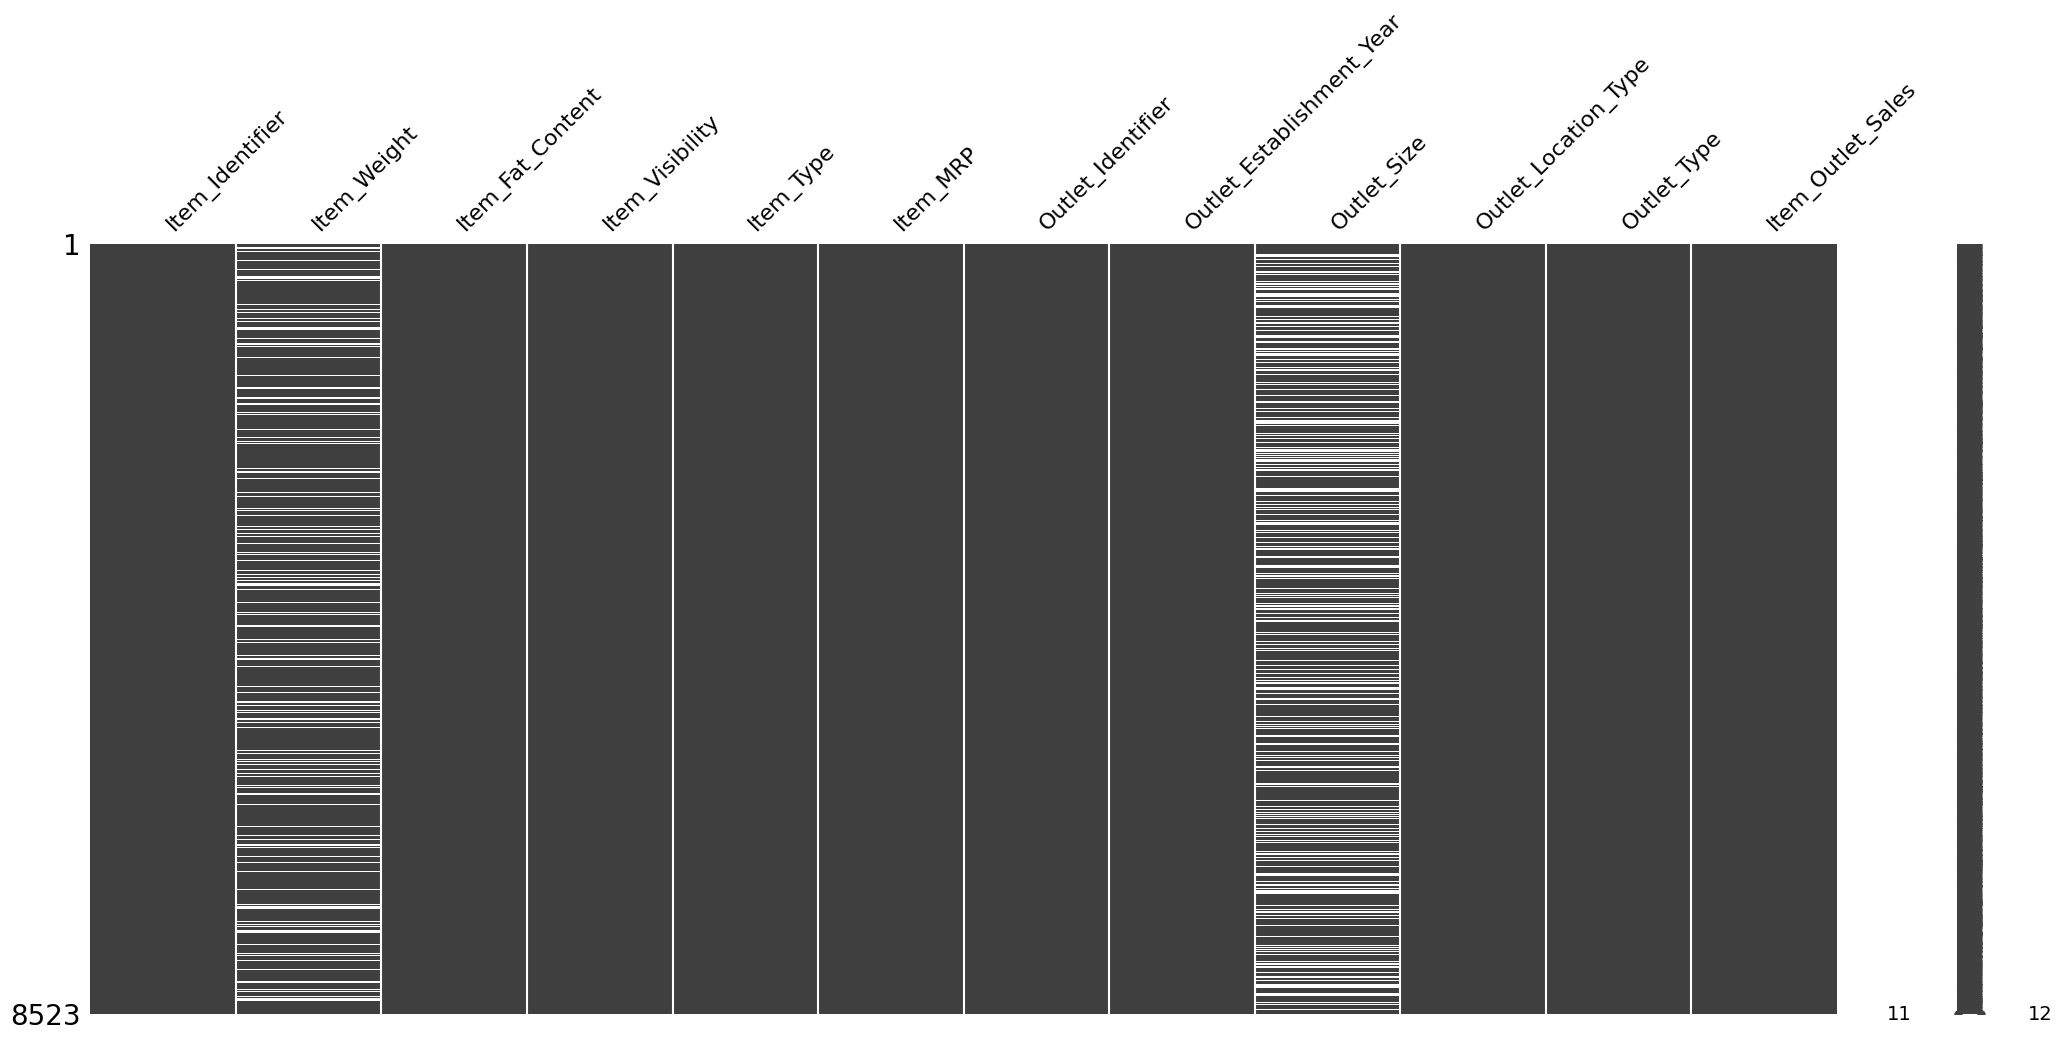

In [361]:
msno.matrix(df_sales);

In [362]:
df_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71


In [363]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

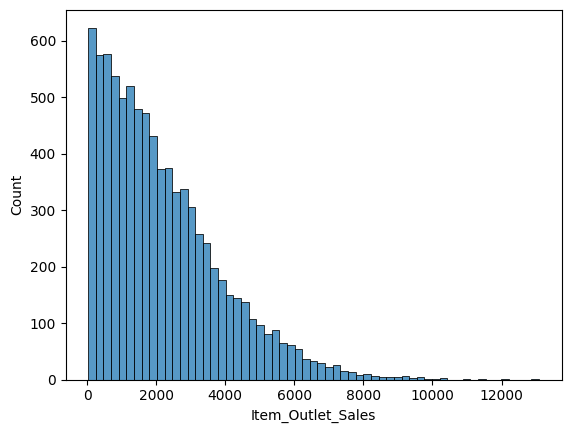

In [364]:
# univariate visualization showing the distribution of values/categories
sns.histplot(data=df_sales, x="Item_Outlet_Sales")

##

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Fat_Content'>

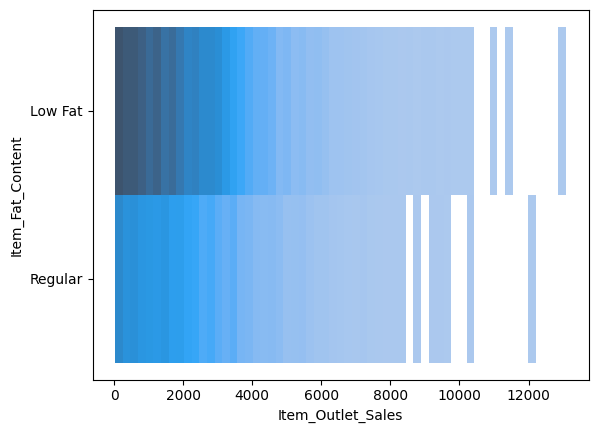

In [365]:
sns.histplot(data=df_sales, x='Item_Outlet_Sales',y='Item_Fat_Content')

## Item Identifier
*   **Nominal**
*   Cardinality 10/10 completely unique values:
*   **Known** before target is determined
Helpful to idenfity which product was sold.

In [366]:
df_sales['Item_Identifier'].nunique()

1559

In [367]:
df_sales['Item_Identifier'].value_counts

<bound method IndexOpsMixin.value_counts of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

## Item Weight
*   Continous numerical
*   High cardniality



In [368]:
df_sales['Item_Weight'].nunique()

415

<Axes: xlabel='Item_Weight', ylabel='Count'>

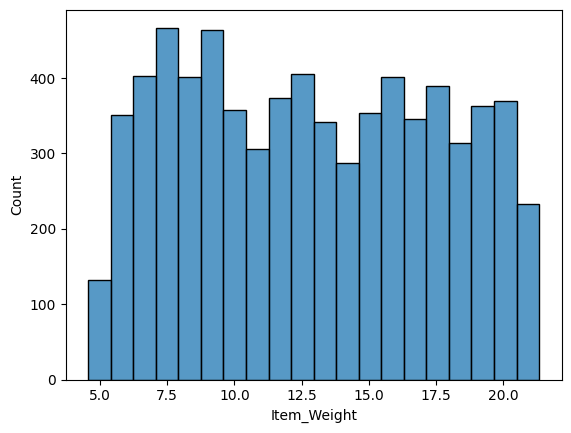

In [369]:
sns.histplot(data=df_sales, x='Item_Weight')

## Item Fat Content
- Catergotical
- Either Regular or Low Fat



In [370]:
df_sales['Item_Fat_Content'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object>

In [371]:
df_sales['Item_Fat_Content'].nunique()

2

<Axes: xlabel='Item_Fat_Content', ylabel='Count'>

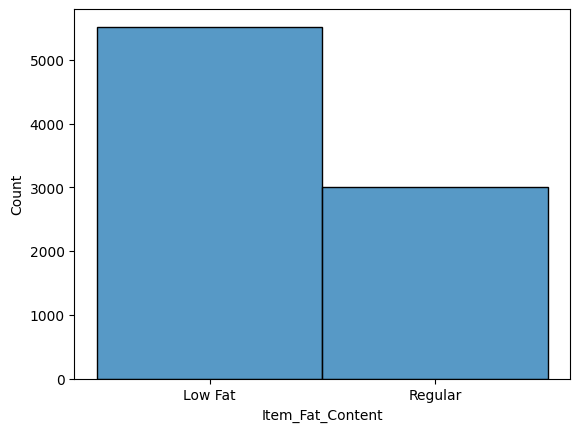

In [372]:
sns.histplot(data=df_sales, x='Item_Fat_Content')

## Item_Visibility              
- float64
-  High cardniality
- Shows how visible product is to customers




<Axes: xlabel='Item_Visibility', ylabel='Count'>

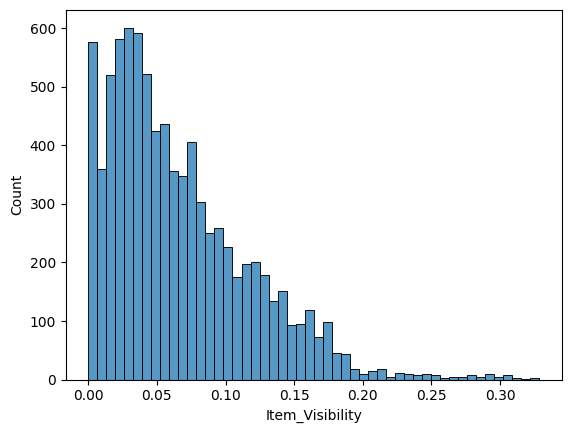

In [373]:
sns.histplot(data=df_sales, x='Item_Visibility')

## Item Type    
- object
- Catergorical
- Types:

In [374]:
df_sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

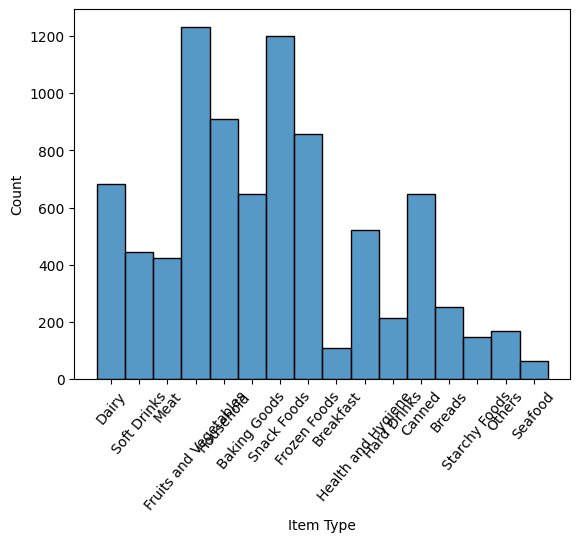

In [375]:
sns.histplot(data=df_sales, x='Item_Type',bins=10)
plt.xlabel('Item Type')
plt.xticks(rotation=50)
plt.show()

## Item MRP                     
- float64
- price of product


In [376]:
df_sales['Item_MRP'].describe()

count   8,523.00
mean      140.99
std        62.28
min        31.29
25%        93.83
50%       143.01
75%       185.64
max       266.89
Name: Item_MRP, dtype: float64

<Axes: xlabel='Item_MRP'>

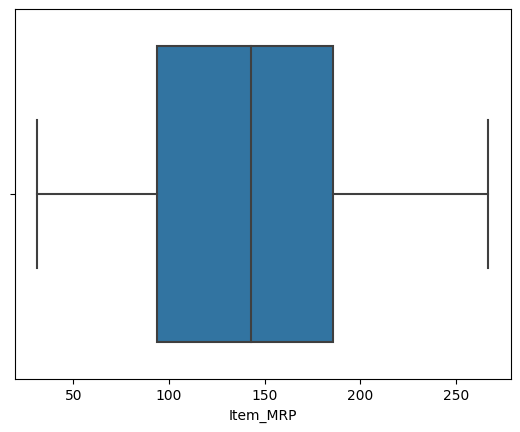

In [377]:
sns.boxplot(data=df_sales, x= 'Item_MRP')

## Outlet Identifier             
- object
- 10 different outlets
- medium cardnility


In [378]:
df_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71


In [379]:
df_sales['Outlet_Identifier'].value_counts()
# There are 10 outlets

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

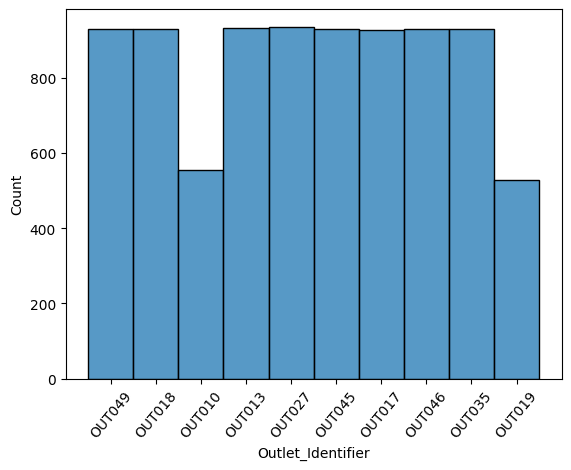

In [380]:
sns.histplot(data=df_sales, x = 'Outlet_Identifier')
plt.xticks(rotation=50)

## Outlet Establishment Year
- int64
- years
- high cardinility

---



In [381]:
df_sales['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [382]:
df_sales['Outlet_Establishment_Year'].describe()

count   8,523.00
mean    1,997.83
std         8.37
min     1,985.00
25%     1,987.00
50%     1,999.00
75%     2,004.00
max     2,009.00
Name: Outlet_Establishment_Year, dtype: float64

<Axes: xlabel='Outlet_Establishment_Year'>

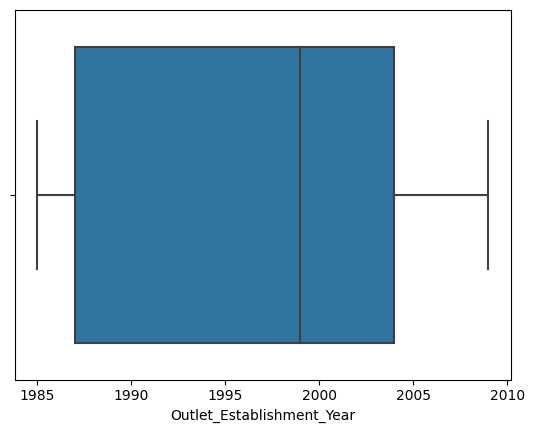

In [383]:
sns.boxplot(data=df_sales, x='Outlet_Establishment_Year')

## Outlet Size          
- object
- ordinal (small, medium, large)


In [384]:
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='Count'>

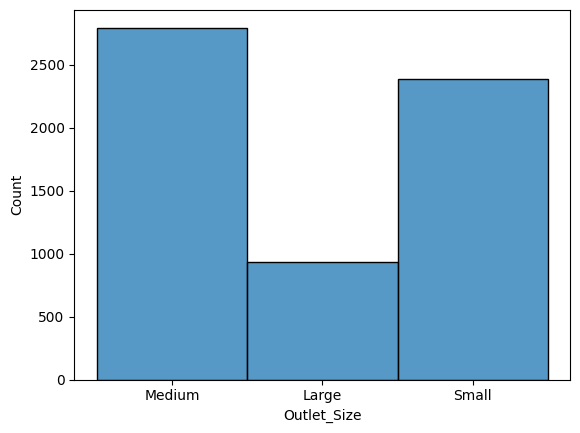

In [385]:
sns.histplot(data=df_sales, x='Outlet_Size')

## Outlet Location Type         
- object
- ordnial
- low cardinality


In [386]:
df_sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='Count'>

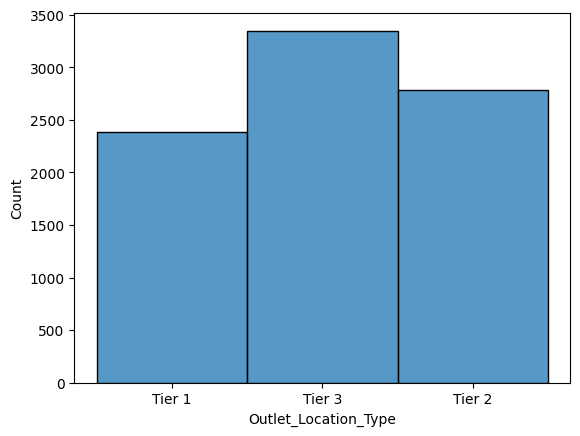

In [387]:
sns.histplot(data=df_sales, x='Outlet_Location_Type')

## Outlet Type                   
- object
- Kind of market
- catergorical


In [388]:
df_sales['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

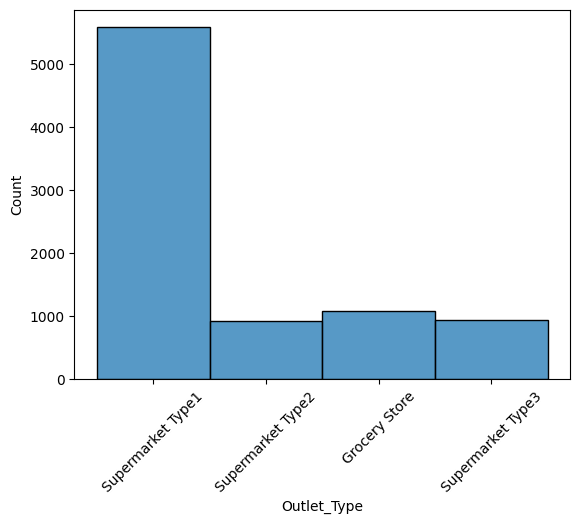

In [389]:
sns.histplot(data=df_sales, x='Outlet_Type')
plt.xticks(rotation=45)

# Target Inspection

## Item Outlet Sales            
- float64
- Total annual sales for outlets
- Many positive outliers

In [390]:
df_sales.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,Large,Tier 3,Supermarket Type1,994.71


In [391]:
  df_sales['Item_Outlet_Sales'].value_counts()

958.75      17
1,342.25    16
703.08      15
1,845.60    15
1,278.34    14
            ..
4,124.63     1
6,622.71     1
1,614.57     1
5,602.71     1
2,778.38     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [392]:
df_sales['Item_Outlet_Sales'].describe()

count    8,523.00
mean     2,181.29
std      1,706.50
min         33.29
25%        834.25
50%      1,794.33
75%      3,101.30
max     13,086.96
Name: Item_Outlet_Sales, dtype: float64

In [393]:
df_sales['Item_Outlet_Sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Outlet_Sales
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

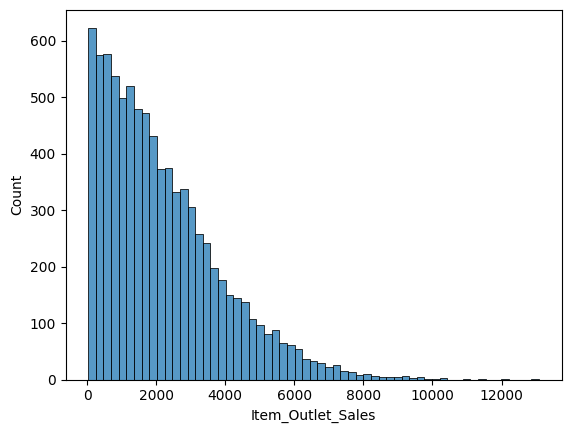

In [394]:
sns.histplot(data=df_sales, x='Item_Outlet_Sales')

<Axes: xlabel='Item_Outlet_Sales'>

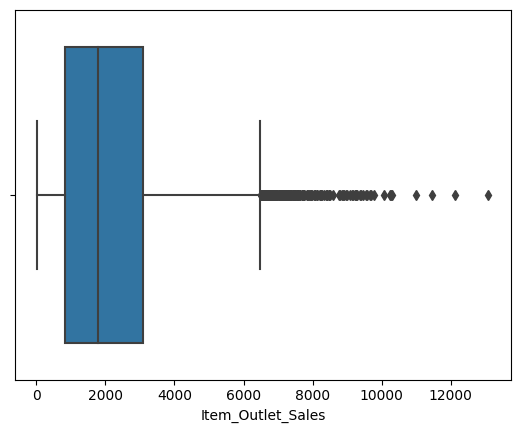

In [395]:
sns.boxplot(data=df_sales, x='Item_Outlet_Sales')

In [396]:
df_sales['Item_Outlet_Sales'].describe()

count    8,523.00
mean     2,181.29
std      1,706.50
min         33.29
25%        834.25
50%      1,794.33
75%      3,101.30
max     13,086.96
Name: Item_Outlet_Sales, dtype: float64

# Creating regression models

## Cleaning and loading data

In [397]:
fpath = '/content/drive/MyDrive/Coding_dojo/StudentFolders16wk24wk/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [398]:
df.duplicated().sum()

0

In [399]:
# Inconsistent
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [400]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [401]:
df['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('LF','Low Fat')
df['Outlet_Size'] = df_sales['Outlet_Size'].replace('High','Large')
df['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace("low fat", "Low Fat")
df['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace('Low fat','Low Fat')

In [402]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [403]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

## Identify the features (X) and target (y)

In [404]:
df = df.drop(columns='Item_Identifier')

In [405]:
X = df.drop(columns = 'Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

## Train test split

In [406]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import GridSearchCV
set_config(transform_output='pandas')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Preproccessing data

In [407]:
X.dtypes
# I will need to change all objects into numerical values

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [408]:
X.info()
# I will need to fill in missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [409]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [410]:
num_cols = X.select_dtypes(exclude='object').columns
ord_cols = ['Outlet_Size']
cat_cols = X.select_dtypes(include='object').drop(columns=ord_cols).columns

In [411]:
# Transformers for num_cols
median_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Pipeline
num_pipeline = make_pipeline(median_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [412]:
# Transformers for ord_cols
impute_missing_ord = SimpleImputer(strategy='constant',fill_value='MISSING')
size_order = ['MISSING','small','medium','large']
ord_encoder = OrdinalEncoder(categories=[size_order])
# Scaler
scaler = StandardScaler()
# make a pipeline
ord_pipe = make_pipeline(impute_missing_ord, ord_encoder, scaler)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['MISSING', 'small', 'medium',
                                             'large']])),
                ('standardscaler', StandardScaler())])

In [413]:
# Transfromers for cat_cols
impute_missing_cat = SimpleImputer(strategy='constant',fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(impute_missing_cat, ohe_encoder)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [414]:
# Create tuples
num_tuple = ('numeric',num_pipeline,num_cols)
ord_tuple = ('ordinal',ord_pipe,ord_cols)
cat_tuple = ('categorical',cat_pipe,cat_cols)

In [415]:
# Need help with fitting ord_cols
col_transformer = ColumnTransformer([num_tuple,cat_tuple],remainder='drop', verbose_feature_names_out=False)
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [416]:
from sklearn import set_config
set_config(transform_output='pandas')
X_train_proc = col_transformer.transform(X_train)
X_test_proc = col_transformer.transform(X_test)
X_test_proc.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.34,-0.78,-1.00,-1.29,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
2957,-1.17,0.10,-1.59,-0.10,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
7031,0.39,-0.48,-1.60,0.14,0.00,1.00,0.00,0.00,0.00,1.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
1084,-0.05,-0.42,0.51,-1.53,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
856,-0.63,-1.05,0.89,0.73,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [417]:
X_train_proc.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.83,-0.71,1.83,1.33,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
7510,0.57,-1.29,0.60,1.33,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
5828,-0.12,1.81,0.24,0.14,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
5327,-1.16,-1.00,-0.95,0.73,1.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
4810,1.54,-0.97,-0.34,0.49,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00


In [418]:
X_train_proc.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year          float64
Item_Fat_Content_Low Fat           float64
Item_Fat_Content_Regular           float64
Item_Type_Baking Goods             float64
Item_Type_Breads                   float64
Item_Type_Breakfast                float64
Item_Type_Canned                   float64
Item_Type_Dairy                    float64
Item_Type_Frozen Foods             float64
Item_Type_Fruits and Vegetables    float64
Item_Type_Hard Drinks              float64
Item_Type_Health and Hygiene       float64
Item_Type_Household                float64
Item_Type_Meat                     float64
Item_Type_Others                   float64
Item_Type_Seafood                  float64
Item_Type_Snack Foods              float64
Item_Type_Soft Drinks              float64
Item_Type_Starchy Foods            float64
Outlet_Identifier_OUT010           float64
Outlet_Iden

# Linear Regression model

In [419]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train_proc)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test_proc)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [420]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_proc, y_train)

LinearRegression()

In [421]:
y_pred = lin_reg_model.predict(X_test_proc)

In [422]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mae)

804.2008994838104


In [423]:
print(mse)

1194387.1272899318


In [424]:
print(r2)
# low r squared value

0.5670906271796635


In [425]:
evaluate_regression(lin_reg_model, X_train_proc, y_train, X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.193
- MSE = 1,297,561.693
- RMSE = 1,139.106
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.201
- MSE = 1,194,387.127
- RMSE = 1,092.880
- R^2 = 0.567


In [426]:
# View parameters that could be tuned
lin_reg_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [427]:
param_grid_lin_reg = {'n_jobs':[1,2,3,5,10]}
grid_search_lin_reg = GridSearchCV(lin_reg_model, param_grid_lin_reg, n_jobs = -1, verbose = 1)

In [428]:
tune_lin_reg = grid_search_lin_reg.fit(X_train_proc, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [429]:
# Obtain the best combination directly
grid_search_lin_reg.best_params_

{'n_jobs': 1}

In [430]:
evaluate_regression(tune_lin_reg, X_train_proc, y_train, X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.193
- MSE = 1,297,561.693
- RMSE = 1,139.106
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.201
- MSE = 1,194,387.127
- RMSE = 1,092.880
- R^2 = 0.567


In [431]:
lin_reg_model.coef_

array([-6.98582454e+00, -2.16491377e+01,  9.84601451e+02,  1.99136398e+15,
       -1.20975832e+14, -1.20975832e+14, -2.20536688e+14, -2.20536688e+14,
       -2.20536688e+14, -2.20536688e+14, -2.20536688e+14, -2.20536688e+14,
       -2.20536688e+14, -2.20536688e+14, -2.20536688e+14, -2.20536688e+14,
       -2.20536688e+14, -2.20536688e+14, -2.20536688e+14, -2.20536688e+14,
       -2.20536688e+14, -2.20536688e+14, -3.03479940e+15,  2.54852323e+15,
       -1.09095388e+15, -2.22331305e+15, -1.46947783e+14, -7.99610973e+14,
       -3.79044226e+14,  9.55622081e+13, -2.15991458e+13, -4.96205580e+14,
        2.54420037e+14, -1.04925740e+15,  5.73298327e+13, -1.80746115e+15,
       -4.78044839e+15, -5.22928288e+15, -9.57707757e+14])

In [432]:
# Saving the coefficients as Pandas series
coeffs = pd.Series(lin_reg_model.coef_, index=X_train_proc.columns )
coeffs

Item_Weight                                           -6.99
Item_Visibility                                      -21.65
Item_MRP                                             984.60
Outlet_Establishment_Year          1,991,363,983,719,323.25
Item_Fat_Content_Low Fat            -120,975,831,806,909.20
Item_Fat_Content_Regular            -120,975,831,806,846.92
Item_Type_Baking Goods              -220,536,688,305,017.66
Item_Type_Breads                    -220,536,688,305,044.41
Item_Type_Breakfast                 -220,536,688,304,970.50
Item_Type_Canned                    -220,536,688,304,987.88
Item_Type_Dairy                     -220,536,688,305,122.91
Item_Type_Frozen Foods              -220,536,688,305,017.38
Item_Type_Fruits and Vegetables     -220,536,688,304,971.09
Item_Type_Hard Drinks               -220,536,688,305,001.28
Item_Type_Health and Hygiene        -220,536,688,304,989.53
Item_Type_Household                 -220,536,688,305,011.78
Item_Type_Meat                      -220

In [433]:
# use .loc to add the intercept to the series
coeffs.loc['intercept'] = lin_reg_model.intercept_
coeffs

Item_Weight                                           -6.99
Item_Visibility                                      -21.65
Item_MRP                                             984.60
Outlet_Establishment_Year          1,991,363,983,719,323.25
Item_Fat_Content_Low Fat            -120,975,831,806,909.20
Item_Fat_Content_Regular            -120,975,831,806,846.92
Item_Type_Baking Goods              -220,536,688,305,017.66
Item_Type_Breads                    -220,536,688,305,044.41
Item_Type_Breakfast                 -220,536,688,304,970.50
Item_Type_Canned                    -220,536,688,304,987.88
Item_Type_Dairy                     -220,536,688,305,122.91
Item_Type_Frozen Foods              -220,536,688,305,017.38
Item_Type_Fruits and Vegetables     -220,536,688,304,971.09
Item_Type_Hard Drinks               -220,536,688,305,001.28
Item_Type_Health and Hygiene        -220,536,688,304,989.53
Item_Type_Household                 -220,536,688,305,011.78
Item_Type_Meat                      -220

In [434]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")
coeffs

Item_Weight                                           -6.99
Item_Visibility                                      -21.65
Item_MRP                                             984.60
Outlet_Establishment_Year          1,991,363,983,719,323.25
Item_Fat_Content_Low Fat            -120,975,831,806,909.20
Item_Fat_Content_Regular            -120,975,831,806,846.92
Item_Type_Baking Goods              -220,536,688,305,017.66
Item_Type_Breads                    -220,536,688,305,044.41
Item_Type_Breakfast                 -220,536,688,304,970.50
Item_Type_Canned                    -220,536,688,304,987.88
Item_Type_Dairy                     -220,536,688,305,122.91
Item_Type_Frozen Foods              -220,536,688,305,017.38
Item_Type_Fruits and Vegetables     -220,536,688,304,971.09
Item_Type_Hard Drinks               -220,536,688,305,001.28
Item_Type_Health and Hygiene        -220,536,688,304,989.53
Item_Type_Household                 -220,536,688,305,011.78
Item_Type_Meat                      -220

# Forest decision tree model

In [435]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_proc, y_train)

RandomForestRegressor(random_state=42)

In [436]:
y_pred_rf = rf_model.predict(X_test_proc)
mae = mean_absolute_error(y_test,y_pred_rf)
mse = mean_squared_error(y_test,y_pred_rf)
r2 = r2_score(y_test,y_pred_rf)
print(mae)

768.2784987968091


In [437]:
print(mse)

1220572.486730597


In [438]:
print(r2)

0.5575996612495009


In [439]:
evaluate_regression(rf_model, X_train_proc, y_train, X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.191
- MSE = 183,857.683
- RMSE = 428.786
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 768.278
- MSE = 1,220,572.487
- RMSE = 1,104.795
- R^2 = 0.558


In [440]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [441]:
# Define dictionary of parameters to tune and the values to try
param_grid_rf = {'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4]}

In [442]:
#Instantiate GridSearchCV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, n_jobs = -1, verbose = 1)

In [443]:
# Fit the Gridsearch on the training data
tune_rf = grid_search_rf.fit(X_train_proc, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [444]:
evaluate_regression(tune_rf, X_train_proc, y_train, X_test_proc, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 646.468
- MSE = 864,684.029
- RMSE = 929.884
- R^2 = 0.708

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 735.494
- MSE = 1,121,320.874
- RMSE = 1,058.924
- R^2 = 0.594


In [445]:
X_test_proc.shape

(2131, 39)

In [446]:
rf_model.feature_importances_

array([5.29156780e-02, 9.92260339e-02, 4.41877285e-01, 2.93514667e-02,
       4.94978100e-03, 5.00401200e-03, 4.04783553e-03, 2.53764989e-03,
       2.63288201e-03, 4.16670330e-03, 6.34682383e-03, 5.60549737e-03,
       7.95314036e-03, 2.98624889e-03, 4.11631690e-03, 6.57170570e-03,
       3.65097701e-03, 1.63813083e-03, 1.72619635e-03, 8.24724425e-03,
       5.37295121e-03, 3.41406087e-03, 1.71944806e-05, 2.48911847e-03,
       4.12001735e-03, 1.27384290e-03, 1.26691475e-05, 3.39030476e-02,
       5.51285526e-03, 4.96018818e-03, 4.82650275e-03, 4.45131525e-03,
       3.50063527e-03, 3.53809844e-03, 3.21488837e-03, 1.91729822e-01,
       1.82520141e-03, 1.23648210e-03, 2.90495008e-02])

In [447]:
# Checking the number of feature importances matches the # of columns
print(len(rf_model.feature_importances_))
print(len(X_train_proc.columns))
len(rf_model.feature_importances_) == len(X_train_proc.columns)

39
39


True

In [448]:
# Saving the feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train_proc.columns, name='Feature Importance')
importances

Item_Weight                       0.05
Item_Visibility                   0.10
Item_MRP                          0.44
Outlet_Establishment_Year         0.03
Item_Fat_Content_Low Fat          0.00
Item_Fat_Content_Regular          0.01
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.01
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.01
Item_Type_Soft Drinks             0.01
Item_Type_Starchy Foods           0.00
Outlet_Identifier_OUT010          0.00
Outlet_Identifier_OUT013          0.00
Outlet_Identifier_OUT017          0.00
Outlet_Identifier_OUT018 

In [449]:
# verifying that feature importances sum to 1
importances.sum()

1.0

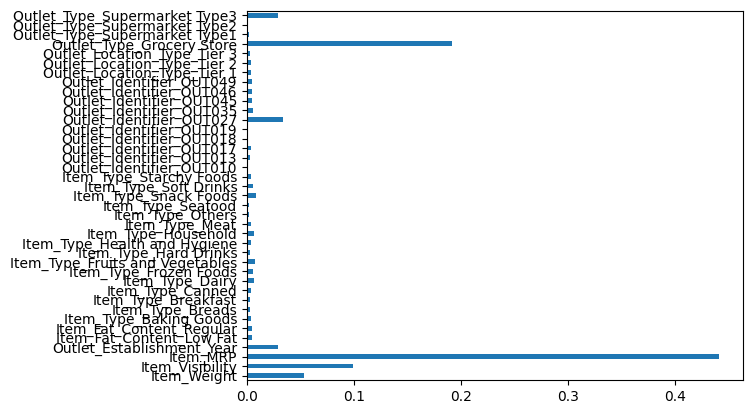

In [450]:
# plot importance
ax = importances.plot(kind='barh')

In [451]:
# Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

Item_MRP                          0.44
Outlet_Type_Grocery Store         0.19
Item_Visibility                   0.10
Item_Weight                       0.05
Outlet_Identifier_OUT027          0.03
Outlet_Establishment_Year         0.03
Outlet_Type_Supermarket Type3     0.03
Item_Type_Snack Foods             0.01
Item_Type_Fruits and Vegetables   0.01
Item_Type_Household               0.01
Item_Type_Dairy                   0.01
Item_Type_Frozen Foods            0.01
Outlet_Identifier_OUT035          0.01
Item_Type_Soft Drinks             0.01
Item_Fat_Content_Regular          0.01
Outlet_Identifier_OUT045          0.00
Item_Fat_Content_Low Fat          0.00
Outlet_Identifier_OUT046          0.00
Outlet_Identifier_OUT049          0.00
Item_Type_Canned                  0.00
Outlet_Identifier_OUT017          0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Baking Goods            0.00
Item_Type_Meat                    0.00
Outlet_Location_Type_Tier 2       0.00
Outlet_Location_Type_Tier

## The best model is the tuned random forest model.  The r squared values are the highest on testing data at .59 compared to the linear regression model r squared value of .56.  Both of these models are ineffective at predicting outlet sales because the mean average error is 735 dollars for the random forest model and 804 dollars for the linear regression model.